In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wrangle_fitbit as wf
import seaborn as sns
import csv

In [2]:
df = wf.get_activities_data()

In [3]:
df.head(2)

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off
date,,,,,,,,,,,
2018-04-26,2635,2931,1.38,2,1347,93,0,0,566,1440,0
2018-04-27,3649,9971,4.70,19,1158,219,46,17,1752,1440,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cals_burned,225.0,3401.911111,632.426578,799.0,3069.00,3385.00,3765.0,5199.0
steps,225.0,8536.186667,5255.746608,0.0,4714.00,7806.00,12380.0,25512.0
dist,225.0,4.046800,2.506253,0.0,2.22,3.68,5.9,12.0
flrs,225.0,12.591111,25.844174,0.0,2.00,7.00,13.0,195.0
mins_sed,225.0,809.520000,243.232639,28.0,654.00,750.00,877.0,1440.0
mins_light,225.0,188.235556,75.170001,0.0,158.00,203.00,236.0,349.0
mins_mod,225.0,14.920000,15.363535,0.0,3.00,11.00,21.0,78.0
mins_heavy,225.0,33.871111,37.195986,0.0,2.00,15.00,63.0,154.0
activity_cals,225.0,1484.546667,747.795790,0.0,1062.00,1481.00,1962.0,3596.0
mins_tot,225.0,1046.546667,187.948200,41.0,940.00,996.00,1076.0,1440.0


In [ ]:
df.resample('W').mean()

In [5]:
df.groupby(df.index.weekday).mean().T

date,0,1,2,3,4,5,6
cals_burned,3242.750000,3304.093750,3270.468750,3425.939394,3464.718750,3553.187500,3551.468750
steps,7245.406250,7856.875000,7594.343750,8748.636364,8847.250000,9549.656250,9904.500000
dist,3.439688,3.702813,3.582812,4.157576,4.180625,4.591563,4.669062
flrs,6.718750,11.250000,11.156250,12.545455,11.062500,13.562500,21.843750
mins_sed,798.250000,834.250000,884.250000,854.090909,843.812500,741.625000,708.968750
mins_light,173.812500,182.250000,177.343750,192.969697,183.812500,197.156250,210.156250
mins_mod,11.937500,9.687500,10.718750,11.151515,16.125000,22.281250,22.656250
mins_heavy,24.750000,28.468750,26.000000,34.181818,38.968750,41.687500,43.031250
activity_cals,1280.250000,1339.187500,1322.562500,1513.757576,1544.812500,1661.343750,1729.000000
mins_tot,1008.750000,1054.656250,1098.312500,1092.393939,1082.718750,1002.750000,984.812500


In [ ]:
sns.pairplot(df)

In [8]:
cor = df.corr()

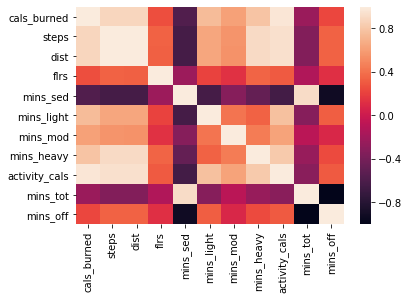

In [9]:
sns.heatmap(cor)

In [14]:
df.head()

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off
date,,,,,,,,,,,
2018-04-26,2635,2931,1.38,2,1347,93,0,0,566,1440,0
2018-04-27,3649,9971,4.70,19,1158,219,46,17,1752,1440,0
2018-04-28,3379,3521,1.66,2,702,155,22,11,1124,890,550
2018-04-29,2851,1639,0.77,0,891,122,0,0,602,1013,427
2018-04-30,2825,1323,0.62,0,880,104,0,0,540,984,456


,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off
date,,,,,,,,,,,
2018-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-03,486.0,-699.0,-0.33,-2.0,-471.0,64.0,16.0,0.0,440.0,-391.0,391.0
2018-05-04,-1127.0,-9067.0,-4.27,-18.0,-146.0,-158.0,-46.0,-17.0,-1483.0,-367.0,367.0


In [15]:
dfnew = df.select_dtypes(exclude='object')

In [16]:
dfnew

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off
date,,,,,,,,,,,
2018-04-26,2635,2931,1.38,2,1347,93,0,0,566,1440,0
2018-04-27,3649,9971,4.70,19,1158,219,46,17,1752,1440,0
2018-04-28,3379,3521,1.66,2,702,155,22,11,1124,890,550
2018-04-29,2851,1639,0.77,0,891,122,0,0,602,1013,427
2018-04-30,2825,1323,0.62,0,880,104,0,0,540,984,456
2018-05-01,3292,2581,1.22,0,919,167,13,2,1068,1101,339
2018-05-02,2660,1372,0.65,0,927,90,0,0,419,1017,423
2018-05-03,3121,2232,1.05,0,876,157,16,0,1006,1049,391
2018-05-04,2522,904,0.43,1,1012,61,0,0,269,1073,367


In [47]:
filename = 'fitbit/2018-04-26_through_2018-05-26.csv'
def csvreaderfor(filename):
    
    
    
    rows = []
    with open(filename) as f:
        cr = csv.reader(f)
        for row in cr:
            if len(row)> 8:
                rows.append(row)
    return rows

In [54]:
from os import walk
a = []
for (dirpath,dirnames,filenames) in walk('fitbit'):
    a.extend(filenames)

In [120]:
def acquire_fitbit_daily():
    rows = []
    file_list = []
    for (dirpath,dirnames,filenames) in walk('fitbit'):
        file_list.extend(filenames)
    
    for i in file_list:
        filename = 'fitbit/' + i
    
        with open(filename) as f:
            cr = csv.reader(f)
            for row in cr:
                if len(row)> 8:
                    rows.append(row)
    
    df = pd.DataFrame(rows[1:],columns=rows[0])
    df = df[df.Date != 'Date']
    return df

In [121]:
df = acquire_fitbit_daily()

In [122]:
df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2018-09-27,"3,348","9,751",4.6,7,849,167,10,42,"1,427"
1,2018-09-28,"2,970","4,531",2.14,4,775,235,0,0,"1,068"
2,2018-09-29,"3,043","7,043",3.32,5,788,218,4,5,"1,220"
3,2018-09-30,"4,184","15,991",7.54,9,652,254,45,72,"2,504"
4,2018-10-01,"3,180","8,307",3.92,8,813,201,5,24,"1,330"


In [112]:
df = df
df = pd.DataFrame(df[1:],columns=df[0])
df = df[df.Date != 'Date']

In [113]:
df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2018-09-27,"3,348","9,751",4.6,7,849,167,10,42,"1,427"
1,2018-09-28,"2,970","4,531",2.14,4,775,235,0,0,"1,068"
2,2018-09-29,"3,043","7,043",3.32,5,788,218,4,5,"1,220"
3,2018-09-30,"4,184","15,991",7.54,9,652,254,45,72,"2,504"
4,2018-10-01,"3,180","8,307",3.92,8,813,201,5,24,"1,330"


In [70]:
test_df = pd.DataFrame(file[1:],columns=file[0])

In [81]:
test_df = test_df[test_df.Date != 'Date']

In [83]:
test_df

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2018-09-27,"3,348","9,751",4.6,7,849,167,10,42,"1,427"
1,2018-09-28,"2,970","4,531",2.14,4,775,235,0,0,"1,068"
2,2018-09-29,"3,043","7,043",3.32,5,788,218,4,5,"1,220"
3,2018-09-30,"4,184","15,991",7.54,9,652,254,45,72,"2,504"
4,2018-10-01,"3,180","8,307",3.92,8,813,201,5,24,"1,330"
5,2018-10-02,"3,162","8,702",4.1,9,872,141,11,34,"1,205"
6,2018-10-03,"3,584","10,729",5.06,6,773,186,7,69,"1,715"
7,2018-10-04,"3,713","13,511",6.37,7,772,152,15,95,"1,895"
8,2018-10-05,"3,603","11,029",5.2,105,822,167,7,71,"1,684"
9,2018-10-06,"3,246","8,140",3.84,6,750,218,20,6,"1,343"


In [78]:
for f in file:
    print(len(f))

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
